# Linear regression using stochastic gradient descent

In [1]:
import sys
assert sys.version_info >=(3,5)

from sklearn import __version__ as skversion
assert skversion >= "1"

In [2]:
skversion

'1.0.1'

In [42]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.base import BaseEstimator,RegressorMixin

In [9]:
X,y, coeff = make_regression(n_samples=1000, n_features=1,coef=True, noise=20)

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sns.set_theme(style="darkgrid")

In [10]:
train_X,test_X, train_y, test_y = train_test_split(X,y, test_size=0.2,random_state=42)

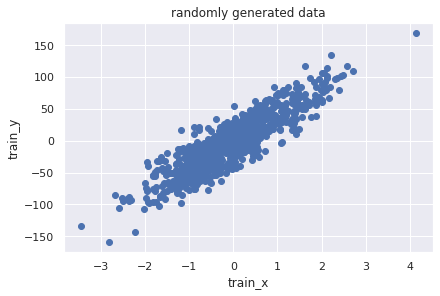

In [11]:
fig,axes = plt.subplots(1, layout='constrained')
axes.scatter(train_X,train_y)
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.title('randomly generated data')
plt.show()

In [18]:
class StochasticGD(BaseEstimator,RegressorMixin):
    def __init__(self,alpha=1,n_epochs=50,t0=5,t1=50):
        self.alpha = alpha
        self.n_epochs = n_epochs
        self.t0 = t0
        self.t1 = t1
    
    def __learning_schedule(self,t):
        return self.t0/(t + self.t1)
    def fit(self,X,y):
        X=np.hstack((np.ones((len(X),1)),X))
        y=y.reshape(len(y),1)
        m=len(y)
        theta = np.random.randn(X.shape[1],1)
        
        for epoch in range(self.n_epochs):
            for i in range(m):
                rand_index = np.random.randint(m)
                xi = X[rand_index: rand_index + 1]
                yi = y[rand_index: rand_index + 1]
                gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                alpha = self.__learning_schedule(epoch * m + i)
                theta = theta - alpha * gradients
        self.coef = theta
        return self
    
    def predict(self,X=None):
        X=np.hstack((np.ones((len(X),1)),X))
        return X.dot(self.coef)
        

In [26]:
reg = StochasticGD()

In [27]:
reg.fit(train_X,train_y)

StochasticGD()

In [33]:
reg.get_params()

{'alpha': 1, 'n_epochs': 50, 't0': 5, 't1': 50}

In [29]:
train_pred= reg.predict(train_X)

In [30]:
lin_mse = mean_squared_error(train_y,train_pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

20.341142494508546

In [31]:
lin_scores = cross_val_score(reg, train_X,train_y,scoring='neg_mean_squared_error', cv=5) # cv requires utility function
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([20.75633796, 19.09220376, 20.83981286, 19.97548206, 21.2745926 ])

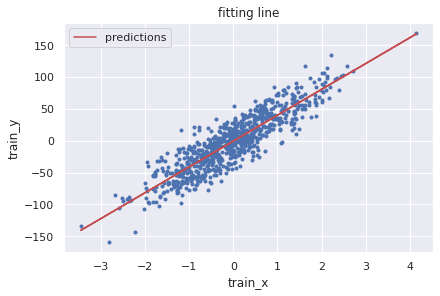

In [32]:
fig,axes = plt.subplots(1, layout='constrained')
axes.plot(train_X,train_y, "b.")
axes.plot(train_X,train_pred,"r-", label="predictions")
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.title('fitting line')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'n_epochs': [25,50,100,]}
sgdreg = StochasticGD()
grid_search = GridSearchCV(sgdreg,param_grid,cv=5)

In [37]:
grid_search.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=StochasticGD(),
             param_grid={'n_epochs': [25, 50, 100]})

In [38]:
lin_reg = grid_search.best_estimator_

In [39]:
lin_reg.get_params()

{'alpha': 1, 'n_epochs': 25, 't0': 5, 't1': 50}

In [40]:
test_pred = lin_reg.predict(test_X)

In [41]:
test_rmse = np.sqrt(mean_squared_error(test_y,test_pred))
test_rmse 

18.556903225225355

## Comparison with sklearn's stochastic GD regressor

In [53]:
sgd = SGDRegressor(loss="squared_error", penalty="none",)

In [54]:
sgd.fit(train_X,train_y)
train_pred_sgd = sgd.predict(train_X)

In [55]:
np.sqrt(mean_squared_error(train_y,train_pred_sgd))

20.340666936041934

In [56]:
test_pred_sgd = sgd.predict(test_X)

In [57]:
np.sqrt(mean_squared_error(test_y,test_pred_sgd))

18.568418241551598